<a href="https://colab.research.google.com/github/MauroGianchino/Data_Science_II-CoderHouse-/blob/main/ProyectoDSII_ParteI_Spotify_Gianchino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primera entrega- Trabajo Final
En este **Notebook** se realiza la primera entrega del proyecto final del curso **Data Science II** de **Coderhouse**.

Alumno: Mauro Ariel Gianchino

Curso: 61725

Tutor: Luciano Lisachi

#Abstract

El objetivo del presente trabajo es predecir la mejor recomendación de canciones a partir de una lista de reproducción de música, mediante el análisis de un dataset y la aplicación de técnicas de Machine Learning.

En primer lugar, por medio de la implementación de la API de Spotify, se genera un dataset de canciones con distintos parámetros que las caracterizan.
Luego se hace un análisis de los datos implementando Data Wrangling y EDA para encontrar relaciones entre los distintos parámetros y determinar cuales de estos son mas útiles para predecir la siguiente canción a escuchar.

Para esto, se plantean hipótesis y se realizan gráficos que permitan obtener concluciones y corroborar si se cumplen o no las mencionas hipótesis.

#Posibles modelos de negocio o comerciales

¿Para qúe querríamos predecir la mejor canción para recomendar en una playlist?¿En que situaciones o contextos nos sería de utilidad? ¿Qué idea comercial puede desprenderse de esto?

La capacidad de predecir con precisión la siguiente canción en una lista de reproducción no solo mejora la experiencia del usuario, sino que también abre diversas oportunidades comerciales. Desde DJs virtuales y asistentes de música personalizados hasta herramientas para productividad, terapia y entretenimiento.

Negocios como aplicaciones de descubrimiento musical, soluciones para tiendas y restaurantes, y asistentes de contenido para creadores pueden ayudar a que estos mejoren la calidad o la experiencia de su actividad.

#Generación de Dataset por medio de la API de Spotify

En esta sección se genera el dataset a utilizar con canciones de Spotify. Para eso, la empresa provee una API llamada *Spotipy* para usar con Python de la cual se puede extraer todo tipo de información de playlists, canciones, álbumes, artistas, podcast, entre otros.

 Considerando que se necesita un dataset de varios miles de canciones, es necesario agrupar muchas playlists y extraer la información de cada una para luego juntar la información en un archivo o dataframe y así crear el dataset.

Para esto, se eligieron playlists creadas por Spotify de cada país, las cuales agrupan las 50 canciones más escuchadas en ese territorio. Además, se agregan otras playlists de distintos géneros musicales para hacer más extenso el dataset

Instalación de paquetes

In [119]:
#Me conecto con drive para trabajar con el dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [120]:
"""!pip install spotipy
import spotipy"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Generación de claves y credenciales

In [121]:
#Credenciales dela API de Spotipy
"""
import os

os.environ["SPOTIPY_CLIENT_ID"] = '888449f1982f4db7870860801c8015e4'
os.environ["SPOTIPY_CLIENT_SECRET"] = '28b5957e13a94793adecc24b6e4a9968'
os.environ["SPOTIPY_REDIRECT_URI"] = "http://127.0.0.1:5000/callback"
os.environ["scope"] = "playlist-read-private"
"""

'\nimport os\n\nos.environ["SPOTIPY_CLIENT_ID"] = \'888449f1982f4db7870860801c8015e4\'\nos.environ["SPOTIPY_CLIENT_SECRET"] = \'28b5957e13a94793adecc24b6e4a9968\'\nos.environ["SPOTIPY_REDIRECT_URI"] = "http://127.0.0.1:5000/callback"\nos.environ["scope"] = "playlist-read-private"\n'

Autorización de parte de la API.

In [122]:
"""from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)"""

'from spotipy.oauth2 import SpotifyClientCredentials\nfrom spotipy.oauth2 import SpotifyOAuth\n\nauth_manager = SpotifyClientCredentials()\nsp = spotipy.Spotify(auth_manager=auth_manager)'

Lista con los ID de todas las playlist de las que se extraerán las canciones.

In [123]:
#Playlists
#vamos a hacer una lista con los id de las playlists
"""playlists_ids = [
"3FL30zPJaggUIJYhPBWyL5", #las 100 canciones mas escuchadas de la historia
"6qv68QBGb4BKfLUb92MSik",#top 100 canciones escuchas en argentina en 2025
"5QdoXOLvXCp9myTm8WDGfl", #top 50 estados unidos"
"0evO3baKNG9RTzMwtHmHp0", #top 121 pop internacionales 2025
"6sQa5sENCgn1tV3xdh9Cpb", #rock internacional 80-90-00
"0FOMOuRkyjexr6XWtNYHtX", #top indie argentina 2025
"29MHXjWqJjcP869WZXs2ld", #top 100 musicas de carnaval
"2IgPkhcHbgQ4s4PdCxljAx", #top 100 Francia 2025
"3O5cscCkI0ZuGuGRSJTqnv", #top 100 escuchado de España 2025
"4GYEN4ZTL60fZIWyVw0uRC", #top 100 canciones de Mexico
"4iO38S6DrNG8yqj8waeuYL", #top 50 canciones colombianas
"0dMexqq0XIWS3QJ74z3ZhD", #top canciones hip-hop de 2000 a 2009
"7pOhaBlKgyOkr5QpBDrFXE", #top canciones reggaeton 2002- 2024
"3oHP7U2qwPVPPE5rbE6PfT", #top canciones reggae
"6oJVKE1qNFk2SwnaHWa0cH", #top 100 country
"6ylvGA8NeX2CuaeGtwHWDJ", #top jazz historico
"26IzSnEtTdEwqWz7jBcTNi", #top musica clasica
"1ti3v0lLrJ4KhSTuxt4loZ", #top hits classic rock
"39nFCFRtOYIRkfx0hggGHa", #top musica electronica
"6nJZhZ9Iqg7hWuEC5JgJD4", #top cumbia 2025
"7E12DeP8o7MikBtnV7R7Sw", #top bachata y salsa
]"""

'playlists_ids = [\n"3FL30zPJaggUIJYhPBWyL5", #las 100 canciones mas escuchadas de la historia\n"6qv68QBGb4BKfLUb92MSik",#top 100 canciones escuchas en argentina en 2025\n"5QdoXOLvXCp9myTm8WDGfl", #top 50 estados unidos"\n"0evO3baKNG9RTzMwtHmHp0", #top 121 pop internacionales 2025\n"6sQa5sENCgn1tV3xdh9Cpb", #rock internacional 80-90-00\n"0FOMOuRkyjexr6XWtNYHtX", #top indie argentina 2025\n"29MHXjWqJjcP869WZXs2ld", #top 100 musicas de carnaval\n"2IgPkhcHbgQ4s4PdCxljAx", #top 100 Francia 2025\n"3O5cscCkI0ZuGuGRSJTqnv", #top 100 escuchado de España 2025\n"4GYEN4ZTL60fZIWyVw0uRC", #top 100 canciones de Mexico\n"4iO38S6DrNG8yqj8waeuYL", #top 50 canciones colombianas\n"0dMexqq0XIWS3QJ74z3ZhD", #top canciones hip-hop de 2000 a 2009\n"7pOhaBlKgyOkr5QpBDrFXE", #top canciones reggaeton 2002- 2024\n"3oHP7U2qwPVPPE5rbE6PfT", #top canciones reggae\n"6oJVKE1qNFk2SwnaHWa0cH", #top 100 country\n"6ylvGA8NeX2CuaeGtwHWDJ", #top jazz historico\n"26IzSnEtTdEwqWz7jBcTNi", #top musica clasica\n"1ti3v0lLrJ4Kh

Obtengo las canciones de las playlists.



In [124]:
"""for playlist_id in playlists_ids:
    # Obtiene las canciones de la playlist
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])"""

"for playlist_id in playlists_ids:\n    # Obtiene las canciones de la playlist\n    results = sp.playlist_tracks(playlist_id)\n    tracks = results['items']\n    while results['next']:\n        results = sp.next(results)\n        tracks.extend(results['items'])"

Intento conseguir las features (los parámetros) de cada canción.

In [125]:
"""for track in tracks:
    track_info = track['track']
    if track_info: #verifica si la cancion existe.
        track_id = track_info['id']
        audio_features = sp.audio_features(track_id)[0]"""

"for track in tracks:\n    track_info = track['track']\n    if track_info: #verifica si la cancion existe.\n        track_id = track_info['id']\n        audio_features = sp.audio_features(track_id)[0]"

En este paso se generó un error el cual indica que no hay respuesta de la API. Investigando en la web, parece ser que Spotify a partir del 27 de noviembre de 2024 restringió (obsoletizó)  varias funciones de la API, entre ellas audio_features(). Esto lo hizo con la excusa de que no querían que  los datos de sus canciones se usen para algoirtmos de machine learning o IA.

Enlace: https://developer.spotify.com/blog/2024-11-27-changes-to-the-web-api

Debido a lo anterior, se optó por usar un dataset público de canciones de Spotify, también obtenido de la API pero tiempos previos al bloqueo. Este dataset junta las canciones con mayor y con menor popularidad en la aplicación.

#Análisis de datos

En la presente sección se realiza el análisis de los datos del dataset mencionado.

##EDA

Lo siguiente será realizar un análisis de los datos para identificar posibles valores nulos, errores y los tipos de datos levantados del archivo CSV.

In [126]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spotify_high_and_low_popularity.csv",delimiter = ";") #cargo el archivo csv
#df= pd.read_csv("dataset_spotify_high_and_low_popularity.csv",delimiter = ";") #cargo el archivo csv
df.head() #muestro las primeras 5 filas

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,592.0,157969.0,521.0,pop,-7777.0,122.0,535.0,"Lady Gaga, Bruno Mars",3.0,304.0,...,0.0,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,308.0,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,507.0,104978.0,747.0,pop,-10171.0,117.0,438.0,Billie Eilish,4.0,358.0,...,608.0,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,2.0,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,808.0,108548.0,554.0,pop,-4169.0,159.0,372.0,Gracie Abrams,4.0,368.0,...,0.0,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,214.0,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,91.0,112966.0,67.0,pop,-407.0,304.0,786.0,Sabrina Carpenter,4.0,634.0,...,0.0,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,939.0,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,783.0,149027.0,777.0,pop,-4477.0,355.0,939.0,"ROSÃ, Bruno Mars",4.0,26.0,...,0.0,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,283.0,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [127]:
df.shape #veo la cantidad de filas y columnas. El tamaño del data frame.

(4831, 29)

El dataset posee 4831 filas y 29 columnas. Se procede a analizar cada columna.

In [128]:
df.info() #veo la información resumida de todas las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist

Las columnas son:


**Track_popularity**: Una puntuación (0–100) que se calcula en función del número total de reproducciones en relación con otras canciones.

**Speechiness**: Mide la presencia de palabras habladas.

**Danceability**: Una puntuación que describe cuán adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del beat y la regularidad general.

**Playlist_name**: El nombre de la playlist donde se incluye la pista.

**Track_artist**: El/los artista(s) que interpretan la pista.

**Duration_ms**: La duración de la pista en milisegundos.

**Energy**: Una medida de intensidad y actividad. Típicamente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas.

**Playlist_genre**: El género principal asociado con la playlist (por ejemplo, pop, rock, clásica).

**Playlist_subgenre**: Un subgénero más específico vinculado a la playlist (por ejemplo, indie pop, punk rock).

**Track_href**: Enlace a la pista.

**Track_name**: El nombre de la pista.

**Mode**: Indica la modalidad de la pista.

**Uri**: Uri de la pista.

**Type**: Tipo de archivo.

**Track_album_release_date**: La fecha de lanzamiento del álbum que contiene la pista.

**Analysis_url**: Uri del analisis.

**Id**: Cadena única de caracteres que identifica a la pista

**Instrumentalness**: La probabilidad de que una pista no contenga voces. Los valores cercanos a 1.0 sugieren pistas exclusivamente instrumentales.

**Track_album_id**: Un identificador unico para el album.

**Playlist_id**: Un identificador único para la playlist.

**Track_id**: Un identificador único asignado a la pista por Spotify.

**Valence**: La positividad musical general (emoción) de una pista. Una valencia alta suena feliz; una valencia baja suena triste o enojada.

**Key**: El tono musical, representado como un número entero de 0 a 11, que corresponde a la notación estándar de clase de tono.

**Tempo**: La velocidad de una pista, medida en pulsaciones por minuto (BPM).

**Loudness**: El volumen general de una pista en decibelios (dB). Los valores más altos indican pistas más fuertes en general.

**Acousticness**: Una medida de confianza de si una pista es acústica (1) o no (0). Refiere a que esté compuesta principalmente por instrumentos acústicos en lugar de instrumentos electrónicos o digitales.

**Liveness**: La probabilidad de que una pista se interprete en vivo. Los valores más altos sugieren una mayor presencia de público.

**Track_album_name**: El álbum en el que se presenta la pista.


También se puede apreciar el tipo de dato de cada columna. Hay floats64, int64 y tipo Object. Según se pudo ver en el header anteriormente, hay datos que son númericos y están como Object, por lo que en próximos pasos deberá modificarse. Un ejemplo es la categoría *Energy*. Si bien el dataset posee 4831 filas, veo que en info() se me indica que hay 4830 en algunas de las columnas y 4829 en una. Puede suceder que una fila esté completamente vacía. Debo hallar esa fila y analizar si la remuevo. Voy a hallar todos los nulos del dataset por cada columna.

In [129]:
print("\nValores nulos en cada columna:")
df.isna().sum()


Valores nulos en cada columna:


,0
energy,1
tempo,1
danceability,1
playlist_genre,0
loudness,1
liveness,1
valence,1
track_artist,0
time_signature,1
speechiness,1


Se observa que en la mayoria de las columnas hay algun valor nulo. El siguiente paso será identificar si eso es en una sola fila o en varias.

In [130]:
df.loc[df.energy.isna() == True] #filtro para buscar en donde la energia sea nula para hallar la fila en cuestión

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1949,NaN,NaN,NaN,lofi,NaN,NaN,NaN,Berhanio,NaN,NaN,...,NaN,4X9vWjNWlZ3qAtyDZ2ZhDj,NaN,NaN,NaN,NaN,NaN,chill,NaN,37i9dQZF1DX8Uebhn9wzrS


Es la fila con índice 1949.

In [131]:
df = df.drop(index=1949) #elimino la fila

In [132]:
df.shape

(4830, 29)

In [133]:
df.loc[df.energy.isna() == True] #filtro para buscar en donde la energia sea nula para hallar la fila en cuestión

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id


Efectivamente, se borró la fila en cuestión. Se vuelve a analizar la cantidad de datos.

In [134]:
print("\nValores nulos en cada columna:")
df.isna().sum()


Valores nulos en cada columna:


,0
energy,0
tempo,0
danceability,0
playlist_genre,0
loudness,0
liveness,0
valence,0
track_artist,0
time_signature,0
speechiness,0


Se observa que en todas las columnas excepto una, no hay valores nulos. Por lo que la fila eliminada poseía todos los nulos vistos previamente. Con respecto al valor faltante en la columna *track_album_name*, se opta por no eliminar esa fila ya que el campo en cuestión no será utilizado para el análisis de datos ni para los algoritmos de machine learning. Esto sucede porque *uri* es un campo que solo identifica de manera única a cada pista, album o artista, por lo que no es relevante para el análisis.

Se decidió eliminar la fila 1949 en su totalidad ya que muchos de sus valores eran nulos y, al contar con varias miles de filas, no se observa que aporte información relevante.

Retomando los tipos de datos de las columnas, se observa que la mayoria de los datos son tipo "Object", por lo que los númericos como la energy, danceability, loudness y demás deben ser transformados.
Por ende, debo cambiar el tipo de dato de aquellas columnas que sean números para realizar los posteriores gráficos y análisis.

In [135]:
df.info() #veo la información resumida de todas las columnas

<class 'pandas.core.frame.DataFrame'>
Index: 4830 entries, 0 to 4830
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4830 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4830 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4830 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4829 non-null   object 
 14  playlist_name

In [136]:
#Cambio el tipo de dato
df.danceability.astype(float)
df.energy.astype(float)
df.instrumentalness.astype(float)
df.loudness.astype(float)
df.acousticness.astype(float)
df.liveness.astype(float)

,liveness
0,122.0
1,117.0
2,159.0
3,304.0
4,355.0
...,...
4826,242.0
4827,286.0
4828,939.0
4829,77.0


Chequeo si los cambios de tipo de dato se efectuaron.

In [137]:
df.info() #veo la información resumida de todas las columnas

<class 'pandas.core.frame.DataFrame'>
Index: 4830 entries, 0 to 4830
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4830 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4830 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4830 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4829 non-null   object 
 14  playlist_name

Los cambios se efectuaron correctamente.

Hago un describe() para tener una idea de algunas métricas para cada columna.

In [138]:
df.describe().round(1)

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0,4830.0
mean,557.0,107317.3,572.1,-8406.0,344.4,474.7,3.9,377.0,54.8,258.1,0.6,5.2,206150.8,439.4
std,264.4,42392.0,242.2,7104.8,306.1,262.8,0.4,221.7,19.8,350.3,0.5,3.6,81745.6,300.4
min,1.0,674.0,1.0,-48069.0,1.0,1.0,1.0,1.0,11.0,0.0,0.0,0.0,35375.0,0.0
25%,379.0,89911.2,466.0,-9811.8,114.0,271.0,4.0,231.0,41.0,0.0,0.0,2.0,159000.0,176.0
50%,613.0,113987.0,635.0,-6726.0,192.0,472.0,4.0,357.5,56.0,0.0,1.0,5.0,194866.5,375.0
75%,764.0,133009.5,748.0,-4726.2,581.0,686.0,4.0,494.8,72.0,517.0,1.0,8.0,233478.0,687.0
max,998.0,241426.0,979.0,1318.0,999.0,999.0,5.0,999.0,100.0,995.0,1.0,11.0,1355260.0,996.0


Considerando valores tan altos para métricas como el *tempo* (ya que esta se mide en BPM y no deberia superar los 300) a partir de una investigación y comparando como son estos valores según la documentación de la API de Spotify, se puede concluir que todas las métricas salvo la duración en milisegundos están multiplicadas por un factor de mil. Esto podría indicar que el creador del dataset así lo hizo para no trabajar con números nominalmente pequeños y poder dimensionar mejor los resultados. Se decide trabajar con los valores tal cual se hallan en el dataset. En el siguiente enlace se puede apreciar como se recibían estas métricas antes de que Spotify obsoletizara el proceso de adquisición de estos.

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

Debido a que en los posteriores análisis se trabjará mayoritariamente con dato numéricos, voy a crear un data frame que contenga las columnas con este tipo de datos.

In [139]:
columnas = ["energy", "danceability", "instrumentalness", "loudness", "acousticness", "liveness", "valence", "tempo", "time_signature","speechiness","track_popularity","mode","key","duration_ms"]
dv = df[columnas]

In [140]:
dv

,energy,danceability,instrumentalness,loudness,acousticness,liveness,valence,tempo,time_signature,speechiness,track_popularity,mode,key,duration_ms
0,592.0,521.0,0.0,-7777.0,308.0,122.0,535.0,157969.0,3.0,304.0,100,0.0,6.0,251668.0
1,507.0,747.0,608.0,-10171.0,2.0,117.0,438.0,104978.0,4.0,358.0,97,1.0,2.0,210373.0
2,808.0,554.0,0.0,-4169.0,214.0,159.0,372.0,108548.0,4.0,368.0,93,1.0,1.0,166300.0
3,91.0,67.0,0.0,-407.0,939.0,304.0,786.0,112966.0,4.0,634.0,81,0.0,0.0,157280.0
4,783.0,777.0,0.0,-4477.0,283.0,355.0,939.0,149027.0,4.0,26.0,98,0.0,0.0,169917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,424.0,352.0,0.0,-8009.0,965.0,242.0,605.0,75466.0,1.0,634.0,33,1.0,10.0,661293.0
4827,349.0,471.0,945.0,-16633.0,975.0,286.0,358.0,147193.0,4.0,656.0,22,1.0,8.0,394400.0
4828,595.0,436.0,868.0,-11494.0,816.0,939.0,87.0,174308.0,4.0,671.0,18,1.0,3.0,473440.0
4829,591.0,489.0,927.0,-10843.0,948.0,77.0,689.0,17476.0,1.0,813.0,23,0.0,8.0,298987.0


##Outliers

Analizando en describe(), no se observan valores que sobresalgan o que esten por fuera de los rangos normales. Sin embargo, en la duración en milisegundos, podemos ver que la máxima duración de una pista es 1355260 milisegundos, lo que equivale a 22.6 minutos. Si bien podría considerarse un outlier, es conocido que existen canciones de esta duración, por lo que se decidió mantenerlo dentro del dataset.



Una vez realizada la limpieza del dataset y el análisis conceptual de los datos y las columnas, se plantean las hipótesis para su posterior evaluación.

#Hipótesis

1. Las pistas con mayor energia y tempo también son de alta danceability. Esto se desprende de que pistas con mayor intensidad, actividad o rapidez son más propensas a ser bailables.

2. Las pistas con más popularidad son de género pop, rock o latino. Últimamente los artistas latinoamericanos han tomado mucha mas relevancia en la industria musical, por lo que su popularidad se vería incrementada. Además, genéros cláiscos como el rock y el pop están presentes desde hace mucho tiempo y son parte del repertorio de gustos del común denomiador de las personas.

3. Las pistas pertenecientes a los géneros rap y hip-hop presentan, en promedio, valores de speechiness significativamente más altos que las pistas de otros géneros. Esto podría ocasionarse a que son géneros en donde se hace mucho énfasis en la palabra hablada.


###Scatter plots

Para corroborar (o no) las hipótesis previamente planteadas, en primer lugar se procede a realizar un scatter plot de cada una de las columnas. Luego, se grafica un histograma de cada parámetro para encontrar relaciones en sus distribuciones.

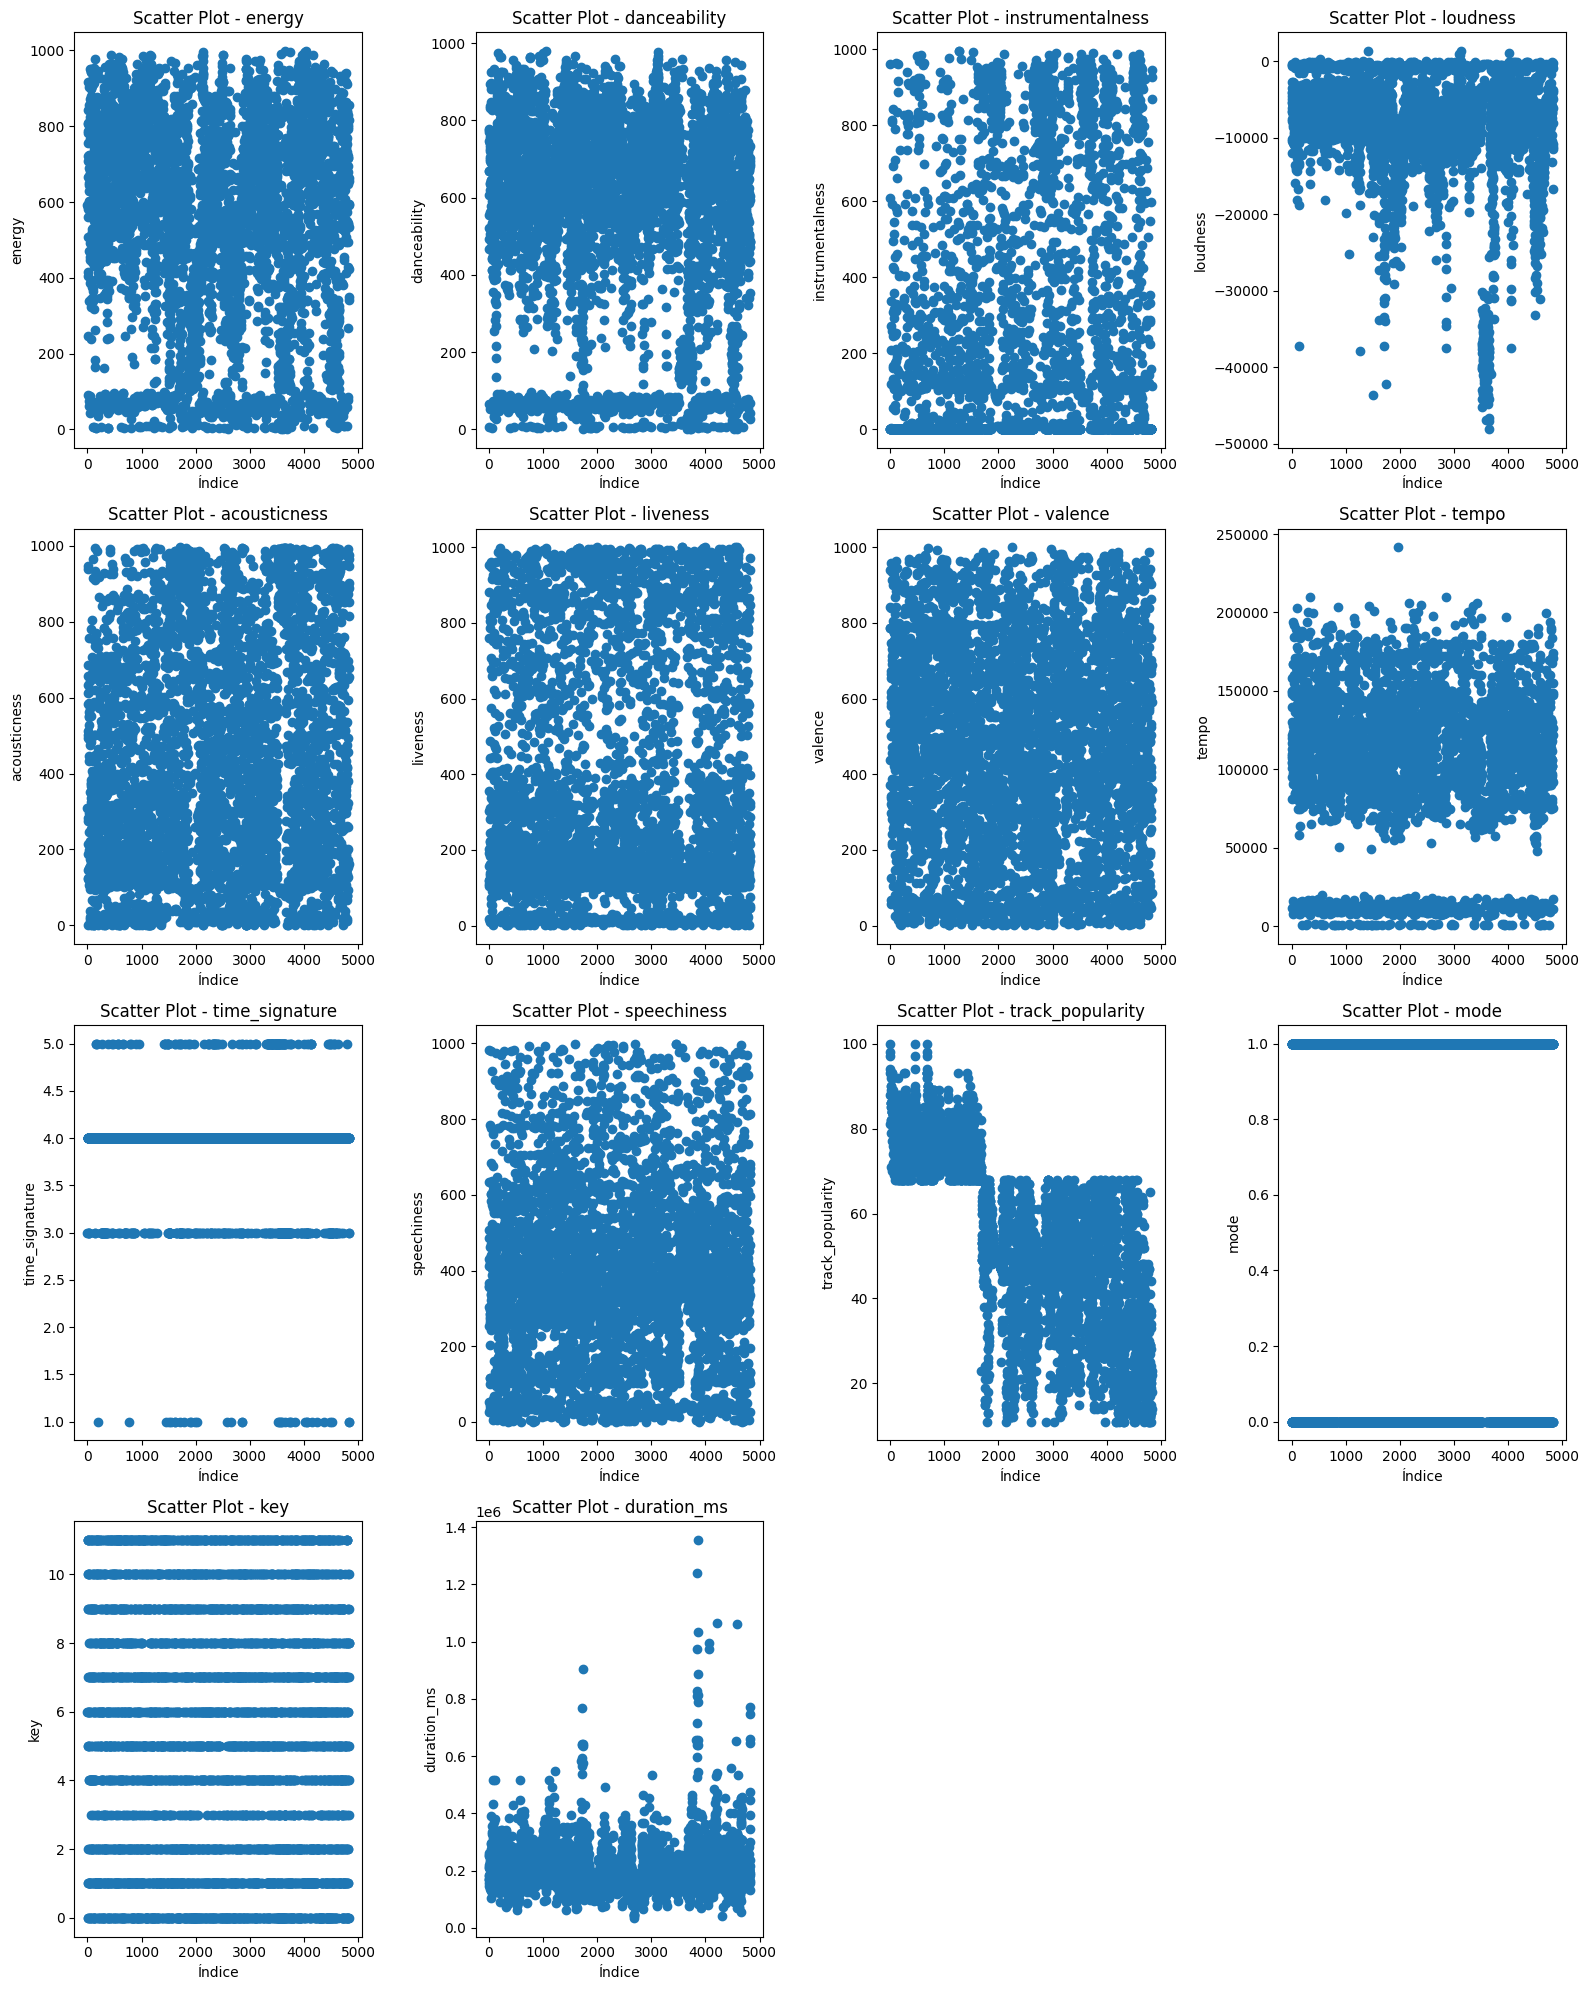

In [141]:
#Scatter plots
num_columnas = len(dv.columns)
fig, axes = plt.subplots(4, 4, figsize=(16, 20)) #hago una matriz de 4x4 ya que tengo que hacer 14 gráficos
for i, columna in enumerate(dv.columns):
    fila = i // 4  # Calculo la fila del subplot
    columna_actual = i % 4  # Calculo la columna del subplot
    if fila < 4 and columna_actual < 4: # Verifico que este dentro del rango de la matriz
      axes[fila, columna_actual].scatter(dv.index, dv[columna])
      axes[fila, columna_actual].set_title(f'Scatter Plot - {columna}')
      axes[fila, columna_actual].set_xlabel('Índice')
      axes[fila, columna_actual].set_ylabel(columna)

# Elimino los subplots vacíos ya que tengo 14 graficos y no 16
if num_columnas < 16:
  for i in range(num_columnas, 16):
    fila = i // 4
    columna_actual = i % 4
    fig.delaxes(axes[fila, columna_actual])

plt.tight_layout()
plt.show()

Tomando en cuenta lo graficado, se puede apreciar que el scatter de energy y danceability presentas grandes similitudes.

Por otro lado, en el de tempo se puede observar que la mayoría de las canciones poseen un tempo de entre 50000 y 200000, dejan una franja vacía entre 50000 y 20000 y luego con más pistas por debajo de 20000. Cabe resaltar un punto aislado cercano a los 250000, el cual no se considera un outlier debido a que la diferencia solo es un 25% con el grueso de las piestas cercanas a 200000.

En el gráfico de popularidad se observa la clara diferencia entre las pistas con mayor y menor popularidad, ya que el dataset es una unión entre dos dataset distintos, uno de mayor y otro de menor popularidad. Parecería que el corte se encuentra cerca de los 70 puntos.



###Histogramas

Se procede a graficar los histogramas.

In [142]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [143]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

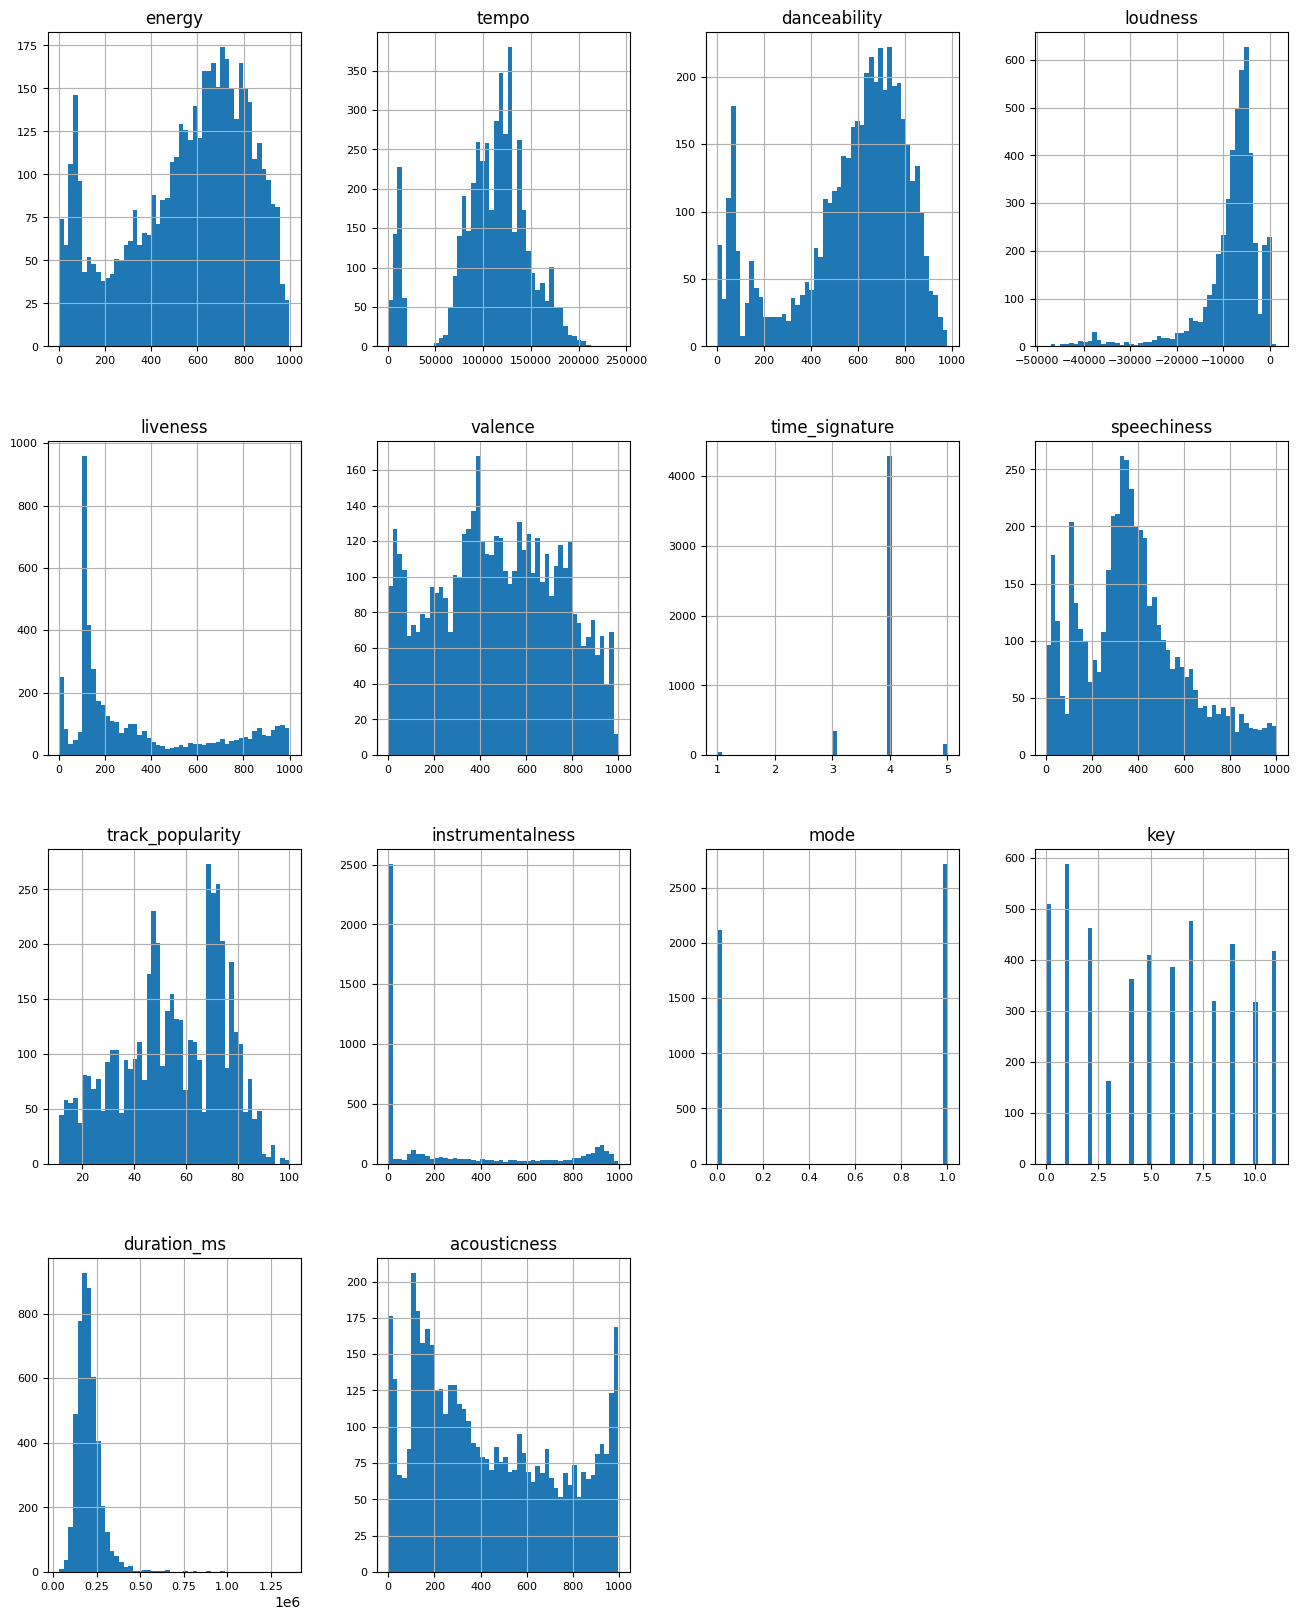

In [144]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Las distribuciones de energy y danceability son muy similares. El tempo parecería seguir esa distribución pero la mayor cantidad de muestras aparecen en valores previos. Presentan gran cantidad en muestras de valores bajos, para luego haber pocas muestras en valores intermedios y por último gran cantidad en muestras de valores altos.Esto nos da la idea de que pueden estar correlacionadas de manera muy fuerte.

Con respecto al instrumentalness, se observa que hay gran cantidad de pistas con poco valor de éste parámetro, indicando que la mayoria de las pistas son habladas o cantadas.

###Matriz de correlación

Finalmente, para encontrar una métrica más concreta de que tan fuerte se relacionan (o no) estas variables, se procede a efectuar una matriz de correlacion de Pearson. Esta nos permitirá corroborar o no una de las hipótesis planteadas.

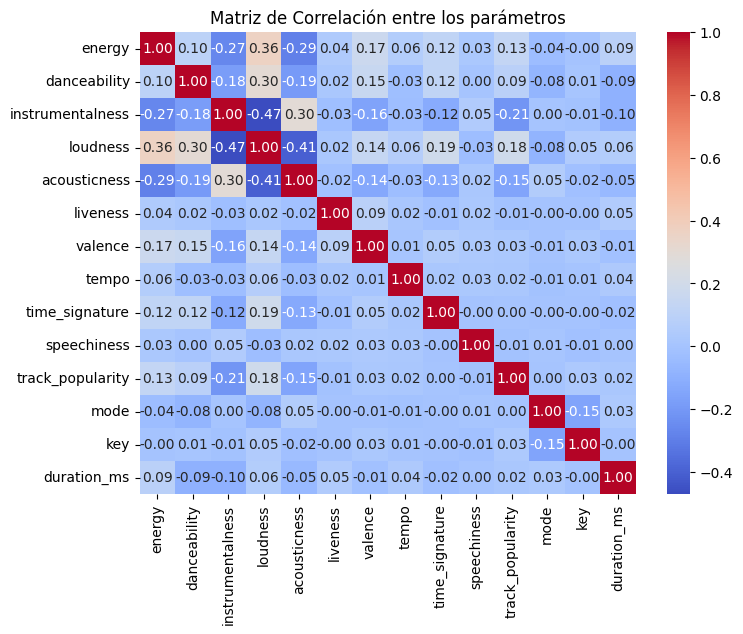

In [145]:
correlacion = dv.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre los parámetros')
plt.show()

####Hipótesis 1

1. Las pistas con mayor energia y tempo también son de alta danceability. Esto se desprende de que pistas con mayor intensidad, actividad o rapidez son más propensas a ser bailables.

Apreciando la matriz de correlación de Pearson, se observa que la correlación entre la energía, el tempo y la danceability es muy débil, adoptando valores de 0.1, 0.06 y 0.03. Por ende, si bien en los histogramas parecía haber cierto grado de similaridad entre sus distribuciones, la matriz nos indica lo contrario.
Una causa puede ser que la relación entre las variables no sea lineal (ya que Pearson lo hace considerando ese caso).

Por otro lado, las que presentan mayor correlación son el loudness con el instrumentalness y con el acousticness, siendo de  -0.47 y -0.41 respectivamente. Esto indica que, si bien la correlación no es muy fuerte, las pistas que suenan más alto en dB tienden a ser menos acústicas y menos instrumentales.

Cabe remarcar también, que la correlación entre energy y loudness es positiva y de valor 0.36, indicando que a medida que el volumen es mayor, la intensidad o actividad de la pista es mayor.

####Hipótesis 2

2. Las pistas con más popularidad son de género pop, rock o latino. Últimamente los artistas latinoamericanos han tomado mucha mas relevancia en la industria musical, por lo que su popularidad se vería incrementada. Además, genéros cláiscos como el rock y el pop están presentes desde hace mucho tiempo y son parte del repertorio de gustos del común denomiador de las personas.



In [146]:
#genero un data frame que solo contenga las pistas con popularidad mayor a 70 (limite arbitrario para considerar "popular" una pista)
df_popular = df[df['track_popularity'] > 70]
df_popular

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,592.0,157969.0,521.0,pop,-7777.0,122.0,535.0,"Lady Gaga, Bruno Mars",3.0,304.0,...,0.00000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,308.0,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,507.0,104978.0,747.0,pop,-10171.0,117.0,438.0,Billie Eilish,4.0,358.0,...,608.00000,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,2.0,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,808.0,108548.0,554.0,pop,-4169.0,159.0,372.0,Gracie Abrams,4.0,368.0,...,0.00000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,214.0,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,91.0,112966.0,67.0,pop,-407.0,304.0,786.0,Sabrina Carpenter,4.0,634.0,...,0.00000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,939.0,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,783.0,149027.0,777.0,pop,-4477.0,355.0,939.0,"ROSÃ, Bruno Mars",4.0,26.0,...,0.00000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,283.0,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,924.0,168017.0,598.0,indie,-4974.0,17.0,611.0,Royel Otis,4.0,623.0,...,799.00000,2tQ8dsmr0EpIJ5FFyUMQES,0.0,6.0,162339.0,205.0,2B664ulJSVBd6B8SAY3Wux,australian,audio_features,37i9dQZF1EIcLyY4fNNQaC
1679,549.0,123879.0,613.0,latin,-8187.0,116.0,78.0,Tems,5.0,231.0,...,0.00000,0x2ntwkM3GoLVAPjAOPrWv,1.0,9.0,180000.0,97.0,2dFqK2ZkYB9Xc47gr3xXWl,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1681,422.0,124357.0,573.0,latin,-7621.0,102.0,693.0,Libianca,5.0,678.0,...,0.00131,5Hmh6N8oisrcuZKa8EY5dn,0.0,10.0,184791.0,551.0,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,725.0,105016.0,711.0,latin,-8315.0,11.0,53.0,Omah Lay,4.0,941.0,...,129.00000,5NLjxx8nRy9ooUmgpOvfem,0.0,3.0,183057.0,424.0,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [147]:
# Cuento la cantidad que hay en base al género
cant_generos = df_popular['playlist_genre'].value_counts()


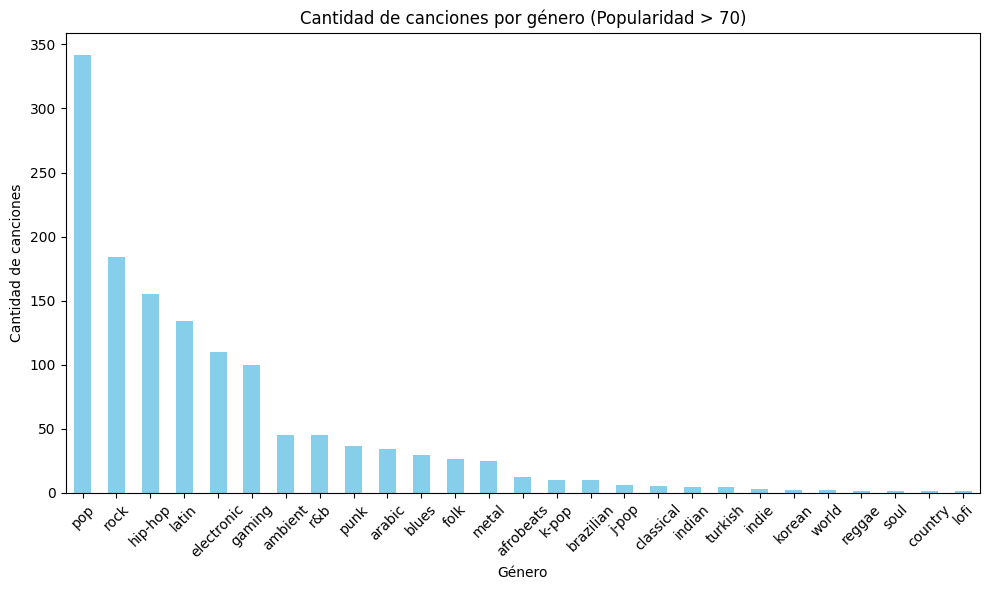

In [148]:
#grafico en barras cantidad de canciones por género
plt.figure(figsize=(10, 6))
cant_generos.plot(kind='bar', color='skyblue')
plt.title('Cantidad de canciones por género (Popularidad > 70)')
plt.xlabel('Género')
plt.ylabel('Cantidad de canciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Efectivamente, dado el gráfico podemos afirmar que el pop es el género predominante en las canciones más populares. Luego lo sigue el rock, latino, hip-hop, electronica y el gaming. Los demás géneros se encuentran mucho menos presentes. Por ende, podemos afirmar que el rock y el latino son acompañados por otros géneros como los más escuchados.

####Hipótesis 3
3. Las pistas pertenecientes a los géneros rap y hip-hop presentan, en promedio, valores de speechiness significativamente más altos que las pistas de otros géneros. Esto podría ocasionarse a que son géneros en donde se hace mucho énfasis en la palabra hablada.

Voy a obtener el promedio de speechiness para cada género.

In [149]:
#Obtengo el promedio de speechiness de cada género
promedios = df.groupby("playlist_genre")["speechiness"].mean().sort_values(ascending=False)

En la métrica speechiness, mientras más cercano a 1 (o en este caso a 1000) más presencias de palabras hay en la pista.

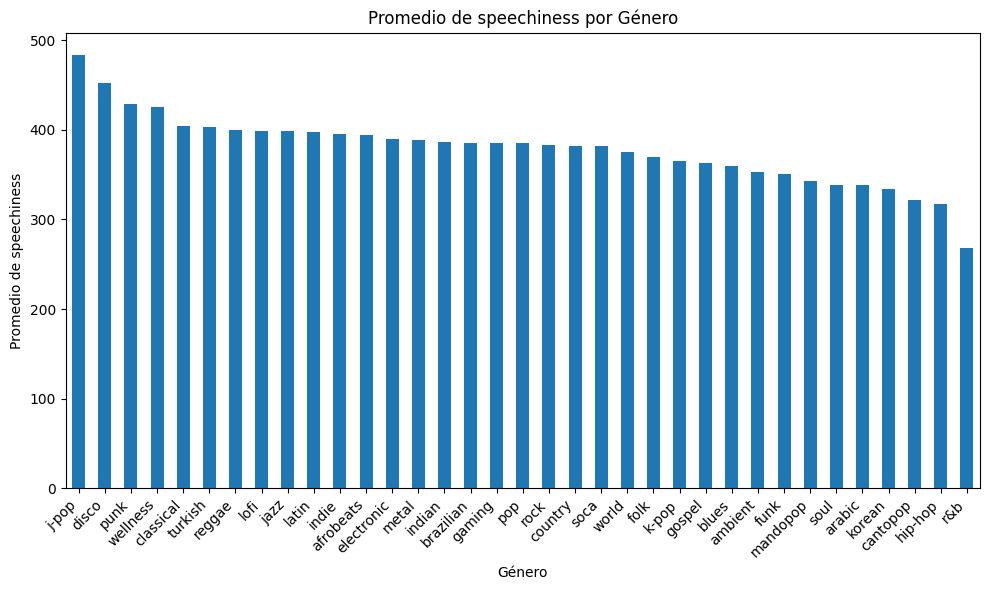

In [150]:
#grafico
plt.figure(figsize=(10, 6))
promedios.plot(kind='bar')
plt.title('Promedio de speechiness por Género')
plt.xlabel('Género')
plt.ylabel('Promedio de speechiness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el gráfico se muestra en orden descendente el promedio de speechiness de cada género. Si bien no está presente el rap, el hip-hop si lo está y sorpresivamente es de los géneros con menor speechiness según el dataset el cual se está trabajando. El género con mayor speechiness es el pop japonés. Si bien hay diferencias entre estos promedios, todos se mueven en un rango de 270 y 470 aproximadamente. Para estar seguros que los promedio son representativos, se pasa a conocer cuantas muestras hay de cada género.

In [151]:
cantidad_canciones = df["playlist_genre"].value_counts().reset_index()
cantidad_canciones

,playlist_genre,count
0,electronic,589
1,pop,515
2,latin,425
3,hip-hop,395
4,ambient,359
5,rock,345
6,lofi,298
7,world,228
8,arabic,208
9,brazilian,148


La cantidad de pistas en el dataset para los géneros de mayor speechiness como el j-pop (23), disco (9) y el punk (74) son muchos menores a la de géneros como el hip-hop, el pop o el rock (mayor a 300). Por ende, para obtener una métrica más acorde y representativa y de esta manera, tener una mejor comparación, se debiera conseguir más muestras de estos géneros.

#Conclusiones

En conclusión, se lograron abordar los objetivos propuestos para el trabajo y corroborar las hipótesis a partir del análisis de los datos y los gráficos asociados.

En primer lugar, se trabajó con la API de Spotify para aprender a manejar una API y se intentó adquirir un dataset a partir de la misma. Al haber la empresa obsoletizado varias funciones para la adquisición de datos y aplicarlos a machine learning, se consiguió un dataset de un usuario hace varios meses generado a partir de la misma API.

Luego, se efectuó EDA para una descripción y limpieza del dataset junto con el descubrimiento de valores nulos y/o outliers.

Se plantearon tres hipótesis que fueron evaluadas en base a scatter plosts,
 histogramas y la matriz de correlación de Pearson junto con análisis y gráficos particulares.

Se pudieron abarcar todas las preguntas e hipótesis de interés infiriendo que:

1. Una mayor energía o tempo en una pista no indica una mayor danceability.

2. Las pistas de mayor popularidad son del género del pop, seguidas por el rock, latino, hip-hop, electrónica y gaming.

3. Las pistas más habladas no corresponden al hip-hop, aunque este análisis sería de mejor calidad si se tuvieran más muestras de los géneros de mayor speechiness, como el j-pop y el disco.
